### Git versioning

In [1]:
import git  #Requires Gitpython installed, to install do "$ pip install Gitpython" in your terminal
import pkg_resources
openfisca_france_location = pkg_resources.get_distribution('openfisca-france').location
repo = git.Repo(openfisca_france_location)
repo.git.status()

sha = repo.head.object.hexsha

print "---This notebook have been runed with--- \n","Openfisca-france :", repo.head.object.hexsha, '\n' 
print "Commit short SHA:", repo.git.rev_parse(sha, short=4)
print "Branch: ", repo.git.rev_parse('--abbrev-ref', "HEAD") #equivalent to: $git rev-parse --abbrev-ref HEAD
print "Date (y/m/d):", repo.git.show("-s", '--format=%ci', 'HEAD^')[:-5],"\n"  # equivalent to: $git show -s --format=%ci HEAD^

print "Openfisca-core :", git.Repo(pkg_resources.get_distribution('openfisca-core').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-core').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "Openfisca-france-data :", git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Aggregates :", git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Survey-Manager :", git.Repo(pkg_resources.get_distribution('OpenFisca-Survey-Manager').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]

---This notebook have been runed with--- 
Openfisca-france : 884e029dd9ec0f5dc8129a52e9a61f5cc87770aa 

Commit short SHA: 884e0
Branch:  mensualisation_wip
Date (y/m/d): 2016-05-30 16:54:22  

Openfisca-core : 4076f591f4bcb571391b65a989e1603fdc4cb759  Date: 2016-02-24 16:11:57 
Openfisca-france-data : 4581a82fd1456cbe0bdd86ab1b57db6fef37c8cf  Date: 2016-05-31 15:46:50 
OpenFisca-Aggregates : fd210d8cfdf6ed68f173d9d5c3eab4a4302ed2b9  Date: 2016-04-04 11:35:03 
OpenFisca-Survey-Manager : 868512d24307aa75cfa7bbbf8420542960963966  Date: 2016-04-04 11:35:03 


### Imports

In [1]:
%matplotlib inline
from __future__ import division

from openfisca_core import periods
from openfisca_plugin_aggregates.tests.reform.test_aggregates_mensualized import create_survey_scenario
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


#Faire des filtres pour Mahdi survey_scenario.create_data_frame_by_entity_key_plural

pd.set_option('expand_frame_repr', False)  #utile quand on utilise pandas en mode console
pd.set_option("display.max_rows",201)
pd.set_option("display.max_columns",201)

# Create Survey Scenario

In [2]:
period = periods.period(2009)

In [3]:
period.this_year.this_month

Period((u'month', Instant((2009, 1, 1)), 1))

In [4]:
survey_scenario = create_survey_scenario(2009)
survey_scenario.new_simulation()

In [5]:
for month in range(3,4):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})

,gain_argent,gain_utilite
0,0.000000,0.000000e+00
1,0.000000,0.000000e+00
2,0.000000,0.000000e+00
3,11.335938,4.145841e-07
4,0.000000,0.000000e+00
5,303.910156,1.295056e-05
6,0.000000,0.000000e+00
7,0.000000,0.000000e+00
8,-74.833008,-3.805413e-06
9,0.000000,0.000000e+00


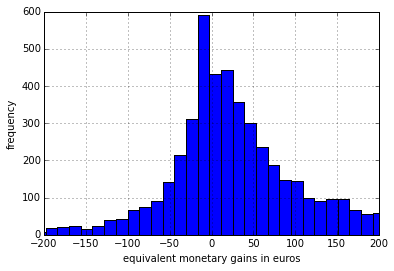

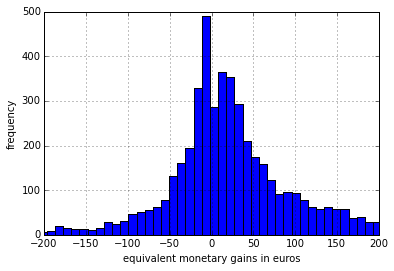

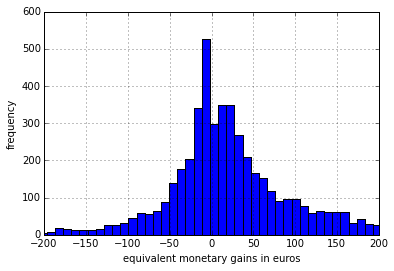

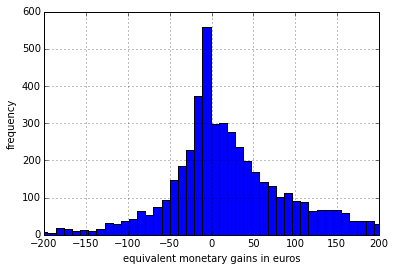

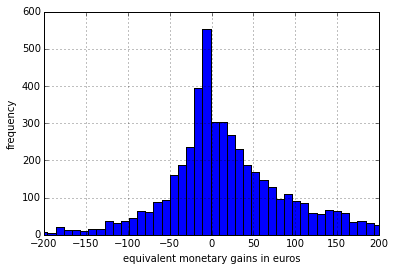

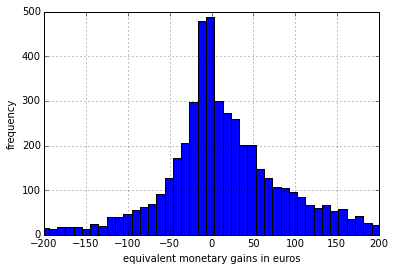

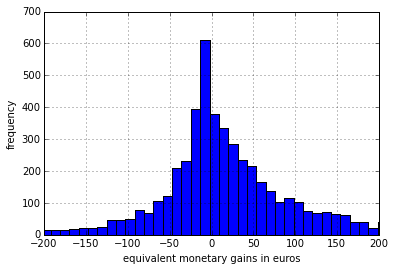

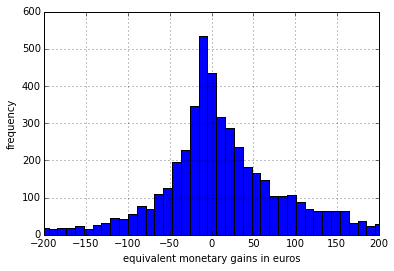

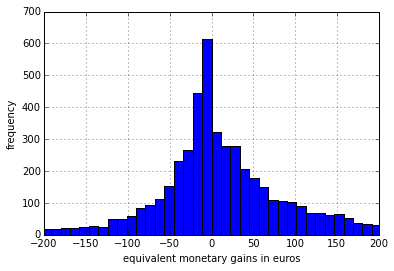

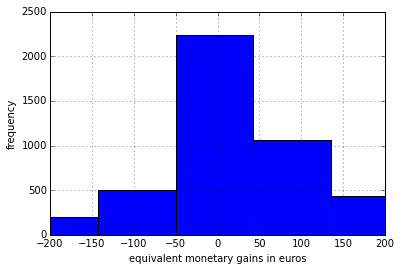

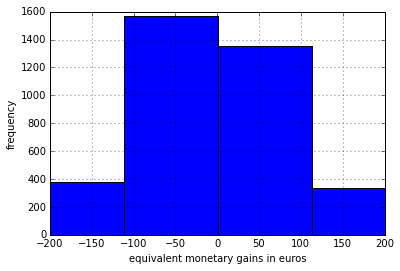

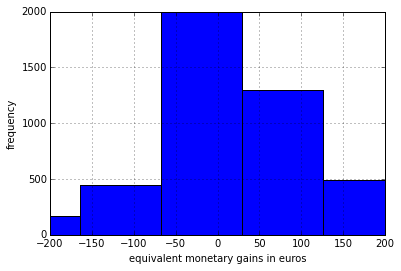

In [6]:
for month in range(1,13):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
    pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})
    plt.figure()
    pd.Series(gain_m)[gain_m!=0].hist(bins = 1500)
    plt.xlim(-200,200)
    plt.xlabel("equivalent monetary gains in euros ")
    plt.ylabel('frequency')
#TODO: problème sur les 3 derniers mois !

In [48]:
monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    monetary_gain_ir += (
    survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [49]:
((monetary_gain_ir.sum(0)/10)*12)/10**9

1.2469275961916018

In [6]:
monetary_gain_ir_rsa = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    monetary_gain_ir_rsa += (
    survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel_rsa_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [7]:
((monetary_gain_ir_rsa.sum(0)/10)*12)/10**9

2.8068383460878907

Gains moyens par ménages.

In [ ]:
month = 7
gain = pd.Series(survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )
gain[np.abs(gain)>1].mean()

In [ ]:
print pd.Series(monetary_gain<-10).value_counts()
print pd.Series(monetary_gain>10).value_counts()
pd.Series(monetary_gain)[monetary_gain>10]

In [ ]:
print pd.Series(weight_menages)[monetary_gains != 0].shape
print monetary_gains_0.shape
pd.Series(weight_menages)[monetary_gains != 0]).shape

In [ ]:
monetary_gains = pd.Series(monetary_gain)
monetary_gains_0 = monetary_gains[monetary_gains != 0]
monetary_gains_0.hist(bins = 500, weights = (pd.Series(weight_menages)[monetary_gains != 0]).values)
plt.xlim(-10000,10000)

In [ ]:
 diff_in_income = pd.Series(
    np.abs(survey_scenario.simulation.calculate("revdisp_mensuel_annuel", "2009-{}".format(month))
          - survey_scenario.simulation.calculate("revdisp_mensuel_compensated_ir_mensuel", "2009-{}".format(month)))>1
    )

In [ ]:
pd.Series(monetary_gain)[diff_in_income].value_counts()

In [ ]:
weight_menages.sum(0)

In [ ]:
monetary_gain.sum(0)/10**9

In [ ]:
print survey_scenario.compute_aggregate('rsa_mensuel')/10**9
print survey_scenario.compute_aggregate('rsa')/10**9

In [ ]:
for month in range(1,13):
    var = 'rsa_socle_majore_mensualise'
    print var, pd.Series(survey_scenario.simulation.calculate(var,'2009-{}'.format(month))*weight_familles).sum()/10**9
    var = 'nb_enfant_rsa'
    print var, pd.Series(survey_scenario.simulation.calculate(var,'2009-{}'.format(month))*weight_familles).sum()/10**9
    var = 'rsa_majore_eligibilite'
    print var, pd.Series(survey_scenario.simulation.calculate(var,'2009-{}'.format(month))*weight_familles).sum()

In [ ]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('rsa_mensuel','2009-{}'.format(month))*weight_familles).sum()/10**9
    print pd.Series(survey_scenario.simulation.calculate('rsa','2009-{}'.format(month))*weight_familles).sum()/10**9

In [ ]:
for month in range(1,13):
    print np.sum(survey_scenario.simulation.calculate('nb_enfant_rsa', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa_non_majore_mensualise', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa_non_majore', '2009-{}'.format(month))*weight_familles)/10**9
    print '.'*10

In [ ]:
for month in range(1,13):
    print np.sum(survey_scenario.simulation.calculate('rsa_majore_mensualise', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa_majore', '2009-{}'.format(month))*weight_familles)/10**9

In [ ]:
for month in range(1,13):
    print np.sum(survey_scenario.simulation.calculate('rsa_majore_mensualise', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa_majore', '2009-{}'.format(month))*weight_familles)/10**9

In [ ]:
for month in range(1,13):
    filter_0 = (pd.Series(survey_scenario.simulation.calculate('ra_rsa', '2009-{}'.format(month)))<0)
    print pd.Series(survey_scenario.simulation.calculate('ra_rsa', '2009-{}'.format(month))).sum()
    print pd.Series(survey_scenario.simulation.calculate('ra_rsa', '2009-{}'.format(month)))[filter_0].sum()
    


In [ ]:
for month in range(1,13):
    print np.sum(survey_scenario.simulation.calculate('rsa_mensuel', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa', '2009-{}'.format(month))*weight_familles)/10**9

In [ ]:
((pd.Series(survey_scenario.simulation.calculate_add('rsa', '2009'.format(month))))*weight_familles).sum()/10**9

In [ ]:
survey_scenario.compute_aggregate('rsa')/10**9

In [ ]:
print pd.Series(survey_scenario.simulation.calculate('irpp')* weight_foyers).sum()
print survey_scenario.compute_aggregate('irpp')

In [ ]:
print survey_scenario.compute_aggregate.__getattribute__

In [ ]:
month = 8
print np.sum(survey_scenario.simulation.calculate('rsa_mensuel', '2009-{}'.format(month))*weight_familles)*12/10**9
print np.sum(survey_scenario.simulation.calculate('rsa', '2009-{}'.format(month))*weight_familles)*12/10**9

##### weights

In [5]:
weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)
weight_menages = survey_scenario.simulation.calculate_add('wprm', period = period).astype(float)
weight_familles = survey_scenario.simulation.calculate_add('weight_familles', period = period).astype(float)
weight_individus = survey_scenario.simulation.calculate_add('weight_individus', period = period).astype(float)

In [9]:
print weight_foyers.shape , "foyers fiscaux"
print weight_menages.shape , "ménages"
print weight_familles.shape, "familles"
print weight_individus.shape, "individus"

(59874,) foyers fiscaux
(49016,) ménages
(55306,) familles
(112359,) individus


In [10]:
print weight_foyers.sum() , "foyers fiscaux"
print weight_menages.sum() , "ménages"
print weight_familles.sum(), "familles"
print weight_individus.sum(), "individus"

33262201.0 foyers fiscaux
27299608.0 ménages
30475517.0 familles
61228244.0 individus


In [11]:
variable = 'revdisp_mensuel_ir_mensuel'
monthly_df = pd.DataFrame(
                dict((column_name+"_"+period, survey_scenario.simulation.calculate_add(column_name, period)) 
                for period in ['{}-{}'.format( 2009, str(month).zfill(2)) for month in range(1, 13)] for column_name in [variable]) #TODO mensualize : allow for periods
                )
#monthly_df.T

In [12]:
#monthly_df.T
monthly_df['revdisp_mensuel_ir_mensuel_2009-09'].mean()

2562.1338

In [13]:
survey_scenario.compute_aggregate('revdisp_mensuel_annuel')/27000000

30971.156008867594

In [14]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

30749.742025517487

In [15]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

30749.742025517487

In [16]:
pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')).value_counts()#TODO !

 0.000000e+00    37530
 1.220703e-04     2228
-1.220703e-04     2199
 6.103516e-05     1800
 2.441406e-04     1791
-6.103516e-05     1662
-2.441406e-04     1591
-3.051758e-05     1246
-4.882812e-04      948
 3.051758e-05      946
 4.882812e-04      879
 1.525879e-05      654
-1.525879e-05      530
-9.765625e-04      506
-3.662109e-04      499
 3.662109e-04      438
 9.155273e-05      372
-1.831055e-04      360
 9.765625e-04      356
 1.831055e-04      291
 7.324219e-04      273
-7.629395e-06      270
-7.324219e-04      269
 7.629395e-06      262
-4.577637e-05      209
 1.953125e-03      183
-1.953125e-03      139
-9.155273e-05      122
-1.464844e-03      109
 1.464844e-03      106
 2.288818e-05       93
-3.051758e-04       78
-3.906250e-03       62
 3.051758e-04       62
 4.577637e-05       58
 3.906250e-03       56
 6.103516e-04       52
-6.103516e-04       50
-2.929688e-03       48
-1.220703e-03       46
 2.929688e-03       41
 1.192093e-07       37
-3.814697e-06       35
 3.814697e-

In [17]:
survey_scenario.compute_aggregate('irpp')

-48038862065.683533

In [18]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('mini_mensuel','2009-{}'.format(month))).mean()


124.687
66.3229
114.181
180.594
136.797
135.994
136.076
134.618
133.74
140.21
129.986
130.273


In [19]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_annuel','2009-{}'.format(month))).mean()


2552.75
2483.99
2540.7
2547.51
2507.43
2517.38
2523.58
2538.83
2567.66
2590.56
3199.38
2600.03


In [20]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_ir_mensuel','2009-{}'.format(month))).mean()


2551.58
2484.06
2540.94
2549.31
2508.64
2517.8
2523.75
2537.29
2562.13
2582.3
3021.07
2586.95


In [21]:
for month in range(1,13):
    print 'annuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_annuel','2009-{}'.format(month))).mean()
    print 'mensuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_mensuel','2009-{}'.format(month))).mean()

annuel -0.000369867
mensuel -0.000369675
annuel -0.000373569
mensuel -0.000373396
annuel -0.00037033
mensuel -0.000370159
annuel -0.000368888
mensuel -0.000368697
annuel -0.000371163
mensuel -0.000370982
annuel -0.000370823
mensuel -0.000370672
annuel -0.000370587
mensuel -0.000370441
annuel -0.000370088
mensuel -0.000369984
annuel -0.000369374
mensuel -0.000369326
annuel -0.000369142
mensuel -0.000369079
annuel -0.000358717
mensuel -0.000359862
annuel -0.000369153
mensuel -0.000369172


In [22]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_gain_fiscal_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add('decote_gain_fiscal'))

In [23]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009')) < 0 ).value_counts()

False    49016
dtype: int64

In [24]:
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
#revdisp[revdisp<0]

In [25]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

In [26]:
survey_scenario.compute_aggregate("utility_ir_annuel")

-118364.70183011307

In [27]:
survey_scenario.compute_aggregate("ra_rsa_i_mensualise")

552969854465.4801

In [28]:
for presta in ['rev_trav_mensuel' , 'pen_mensuel' , 'psoc_mensuel','ppe']:
    print presta
    for month in range(1,13):
        print pd.Series(survey_scenario.simulation.calculate(presta,'2009-{}'.format(month))).mean()


rev_trav_mensuel
813.492
810.8
811.185
810.757
811.691
813.136
814.277
817.74
824.117
835.849
836.74
841.17
pen_mensuel
241.897
242.088
243.89
242.802
245.302
248.539
250.039
254.043
260.873
255.497
526.99
258.776
psoc_mensuel
181.405
123.034
170.863
182.062
138.264
137.477
137.529
136.075
135.177
141.63
131.38
131.637
ppe
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515


## Compare IRPP on monthly basis vs. on annual basis

In [29]:
print survey_scenario.compute_aggregate('irpp')/10**9
print survey_scenario.compute_aggregate('irpp_mensuel')/10**9
print u"l'impôt mensuel mène à un prélèvement de {} euros en plus".format(survey_scenario.compute_aggregate('irpp_mensuel')-survey_scenario.compute_aggregate('irpp') )

-48.0388620657
-53.8233637481
l'impôt mensuel mène à un prélèvement de -5784501682.38 euros en plus


In [30]:
pd.Series(survey_scenario.simulation.calculate("irpp") == survey_scenario.simulation.calculate("irpp_mensuel")).value_counts()

False    35248
True     24626
dtype: int64

In [ ]:
#np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('irpp'),survey_scenario.simulation.calculate_add("irpp_mensuel"), decimal = -0,
#                                    )

#### Lambda compensation

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))

In [ ]:
execute_time_consuming_graph = False
if execute_time_consuming_graph == True : 
    lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
    lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
    filtr_near0 = np.abs(lambda_compensation)-0.2 >= 0
    lambda_compensation[filtr_near0 ].hist(bins = 70000, weights = pd.Series(weight_foyers)[filtr_near0 ].values)
    plt.xlim(-20,20)

In [ ]:
if execute_time_consuming_graph == True :
    lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
    lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation[np.abs(lambda_compensation)-0.2 >= 0 ].hist(bins = 700000)
    plt.xlim(-20,20)

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
lambda_compensation[np.abs(lambda_compensation)-2000 >= 0 ].hist(bins = 10)
#plt.xlim(-20,20)

#### Pourcentage du sample à 0

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
#lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
#lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)==0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

#### Pourcentage du sample presque à 0

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)<0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

#### Pourcentage du sample > ou < à  0

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<0].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à 0 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0 ".format(round(prct2,2)*100)

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<-0.01].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à -0.01 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0.01 ".format(round(prct2,2)*100)

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<-0.01].shape[0]/lambda_compensation[np.abs(lambda_compensation)>0.01].shape[0]
prct2 = lambda_compensation[lambda_compensation>0.01].shape[0]/lambda_compensation[np.abs(lambda_compensation)>0.01].shape[0]
print "{} % du sample à un lambda < à -0.01 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0.01 ".format(round(prct2,2)*100)

#### Pourcentage du sample entre -20 et 20

In [ ]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)>70].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda supérieur  à 70 ".format(round(prct1,2)*100)

#### Lambda compensation négatif du à la décote ?

In [ ]:
pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12).mean()

In [ ]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add("decote"))

In [ ]:
filtre_unequal_decote = decote_monthly != decote_annual

In [ ]:
lambda_compensation[filtre_unequal_decote].shape

In [ ]:
lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)].hist(bins = 500)
plt.xlim(-20,20)

In [ ]:
to_graph = lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)]


In [ ]:
poids = pd.Series(weight_foyers)[
        filtre_unequal_decote&
        (np.abs(lambda_compensation)>.1)&
        (np.abs(lambda_compensation)<100)]

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(to_graph.values, bins = 100, weights = poids.values)
plt.xlabel(r'$\lambda$',fontsize = 20 )
plt.ylabel('Headcount',fontsize = 17)

In [ ]:
lambda_zero = pd.Series(lambda_compensation == 0 )
pd.Series(weight_foyers)[lambda_zero].sum()



In [ ]:
index_exceptional_lambda = lambda_compensation[np.abs(lambda_compensation)>100].index

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df['decote_gain_fiscal_mensuel'] = df.decote_gain_fiscal_mensuel_times_12/12
df.iloc[index_exceptional_lambda]

In [ ]:
survey_scenario.simulation.calculate("irpp_mensuel","2009-08")[4]

In [ ]:
df["difference"] = np.abs(df.decote_gain_fiscal- df.decote_gain_fiscal_mensuel)>0.01
df[lambda_compensation == -12].difference.value_counts()

In [ ]:
df.shape

In [ ]:
df[lambda_compensation == -12][['decote_gain_fiscal', 'decote_gain_fiscal_mensuel', 'lambda_compensation',"irpp",'irpp_mensuel' ]]

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
df.lambda_compensation[df.lambda_compensation< -70] = 0

In [ ]:
df[np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)+1>0].shape

In [ ]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-1<0)
                      & (np.abs(df.lambda_compensation)>0.1)].hist(bins = 100)
plt.xlim(-20,20)

In [ ]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)].mean()

In [ ]:
df[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)]

In [ ]:
df[df.lambda_compensation<-1]

In [ ]:
df[df.lambda_compensation<-1][df.decote_gain_fiscal> df.decote_gain_fiscal_mensuel_times_12]

## Compensated irpp

In [ ]:
print max(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))
print min(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

In [ ]:
df[df.compensated_irpp_mensuel - df.irpp<2][['irpp', 'compensated_irpp_mensuel', 'irpp_mensuel']]

In [ ]:
print survey_scenario.compute_aggregate('compensated_irpp_mensuel')
print survey_scenario.compute_aggregate('irpp')

In [ ]:
impot_mensuel_times_12 = survey_scenario.simulation.calculate("irpp_mensuel", period)*12
lambda_compensation = survey_scenario.simulation.calculate("lambda_compensation", period.this_year)



compensated_irpp = impot_mensuel_times_12/(12 + lambda_compensation)

In [ ]:
compensated_irpp[743]

In [ ]:
(survey_scenario.simulation.calculate("irpp", period.this_year) == 0)*0

In [ ]:
compensated_irpp = (survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * 0 + \
                ~(survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * np.nan_to_num(compensated_irpp) ;compensated_irpp[[4,743]]

In [ ]:
compensated_irpp = (
                (survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * #Condition
                (survey_scenario.simulation.calculate("irpp", period.this_year)/12) # on répartit sur l'année
            ) + ~(survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * compensated_irpp #condition opposée
compensated_irpp[[4,743]]

In [ ]:
df[df.lambda_compensation.isnull()]

In [ ]:
survey_scenario.simulation.calculate_add('irpp')

In [ ]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

In [ ]:
lambda_compensation = survey_scenario.simulation.calculate('lambda_compensation')
np.all(lambda_compensation != np.nan)
lambda_compensation != np.nan
hello = lambda_compensation[1]
assert np.all(np.isfinite(lambda_compensation))


In [ ]:
sal_pen_df = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['irpp'], ['irpp_mensuel','compensated_irpp_mensuel'])['foyers_fiscaux']

sal_pen_df.T

In [ ]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

## Utility annalysis 

In [31]:
survey_scenario.compute_aggregate("utility_ir_annuel") #TODO : find why Nan

-118364.70183011307

In [38]:
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel_rsa_mensuel','2009')).mean()

-0.0044317
-0.00443144
-0.0044296
-0.00442503


In [39]:
u_ir_m_rsa_m = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel_rsa_mensuel','2009'))
u_c_ir = pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009'))
u_ir_m = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009'))
u_ir_a = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009'))


In [40]:
print u_ir_m_rsa_m.mean(),1/u_ir_m_rsa_m.mean()
print u_c_ir.mean(),1/u_c_ir.mean()
print u_ir_m.mean(),1/u_ir_m.mean()
print u_ir_a.mean(),1/u_ir_a.mean()

-0.00442503 -225.987086805
-0.0044296 -225.754150544
-0.00443144 -225.66006708
-0.0044317 -225.646954762


In [35]:
print u_c_ir.describe()
print u_ir_m.describe()
print u_ir_a.describe()

count    49016.000000
mean        -0.004430
std          0.000801
min         -0.006125
25%         -0.004956
50%         -0.004458
75%         -0.003898
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004431
std          0.000801
min         -0.006125
25%         -0.004958
50%         -0.004460
75%         -0.003899
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004432
std          0.000801
min         -0.006125
25%         -0.004957
50%         -0.004461
75%         -0.003900
max         -0.000247
dtype: float64


In [36]:
print 1/u_c_ir.describe()
print 1/u_ir_m.describe()
print 1/u_ir_a.describe()

count       0.000020
mean     -225.754151
std      1248.919032
min      -163.268352
25%      -201.778805
50%      -224.292949
75%      -256.509733
max     -4055.660513
dtype: float64
count       0.000020
mean     -225.660067
std      1248.181781
min      -163.268352
25%      -201.708609
50%      -224.211819
75%      -256.444102
max     -4055.660513
dtype: float64
count       0.000020
mean     -225.646955
std      1248.757988
min      -163.268352
25%      -201.730532
50%      -224.156762
75%      -256.427650
max     -4055.660513
dtype: float64


(0, 200)

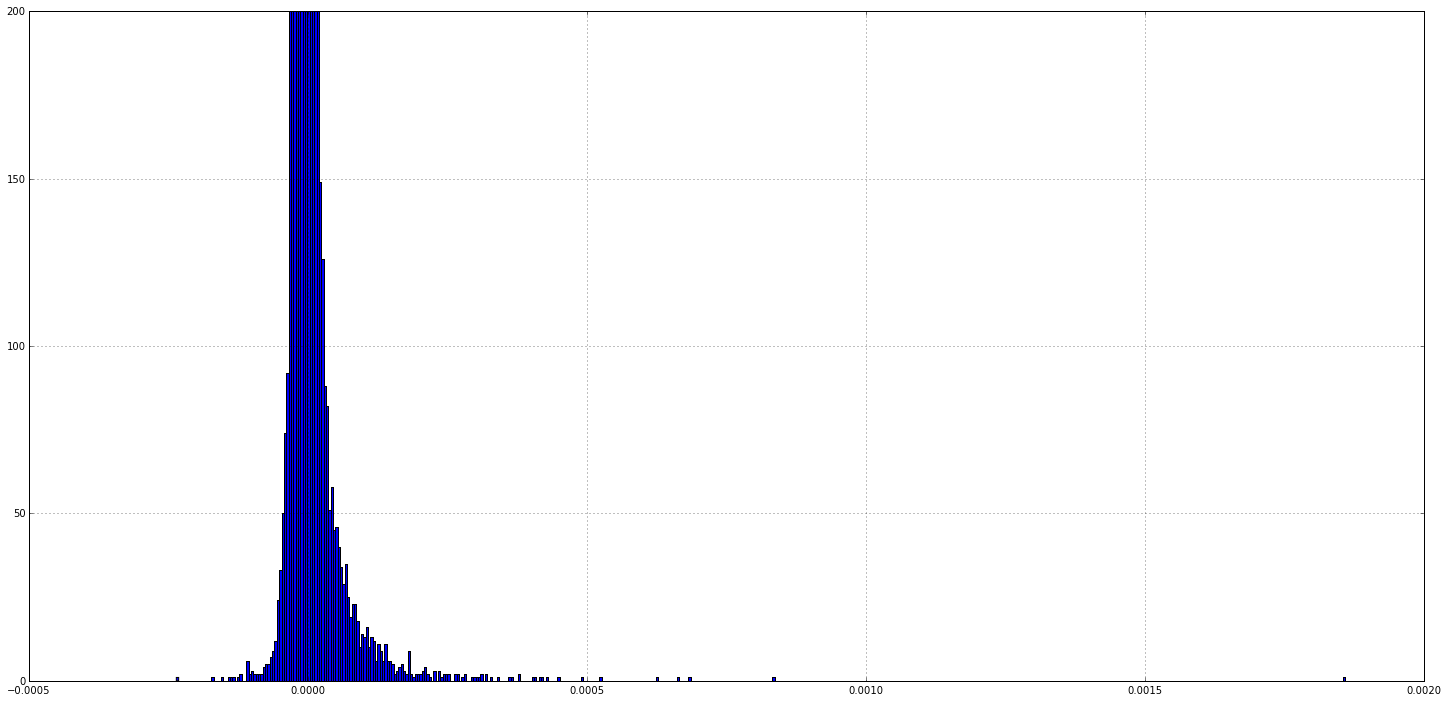

In [41]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [42]:
((u_ir_m - u_ir_a)<-0.0000001).value_counts()

False    42292
True      6724
dtype: int64

(0, 200)

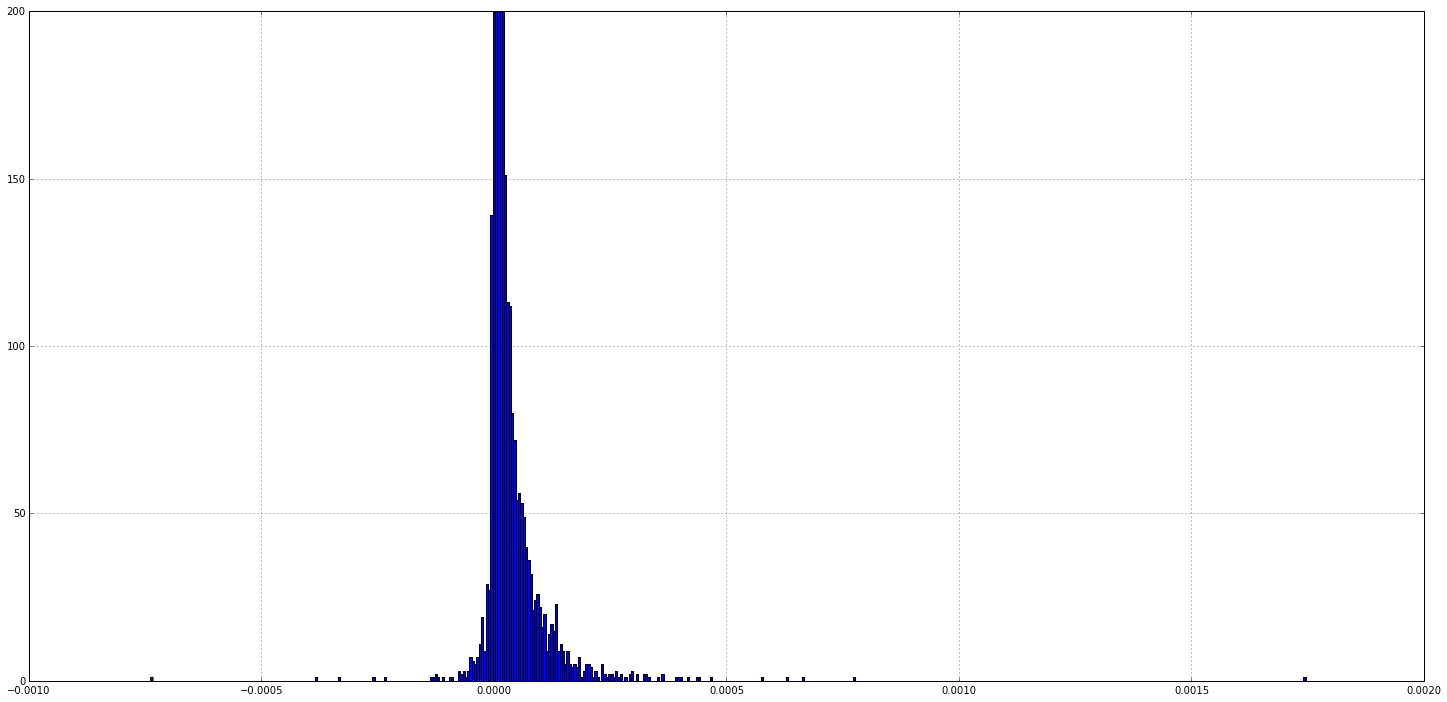

In [43]:
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [44]:
((u_c_ir - u_ir_a)<-0.0000001).value_counts()

False    48401
True       615
dtype: int64

##### Graphs with weights

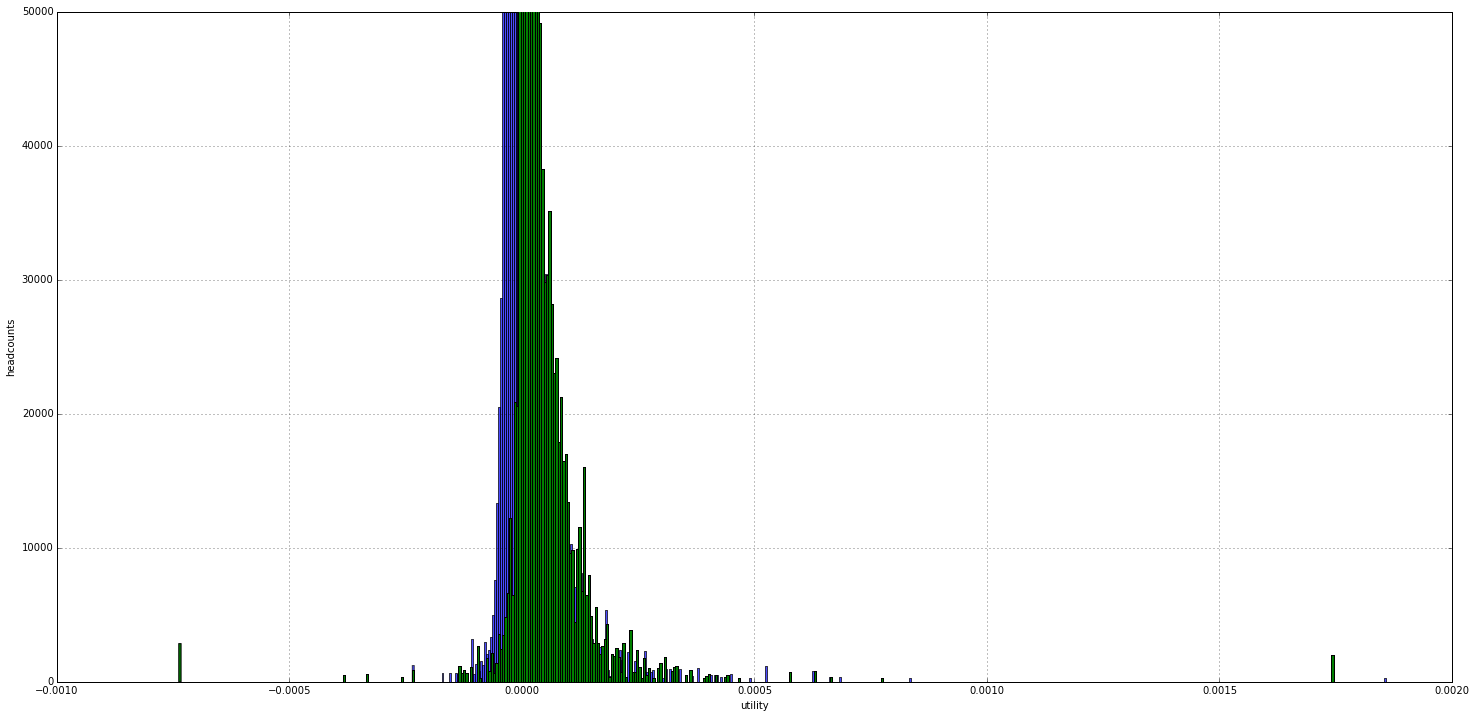

In [45]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12), zorder=1, alpha = 0.7, weights = weight_menages,)
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12), weights = weight_menages,zorder=10, alpha = 1)
plt.ylim(0,5*10**4)
plt.xlabel('utility')
plt.ylabel('headcounts')

In [ ]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
plt.ylim(0,20*10**4)
plt.xlim(-0.0005, 0.0005)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)
plt.xlabel('utility')
plt.ylabel('headcounts')

In [ ]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
#plt.ylim(0,70*10**5)
plt.xlim(-0.00002, 0.00002)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)
plt.xlabel('utility')
plt.ylabel('headcounts')

In [ ]:
weight_menages = pd.Series(weight_menages)

In [ ]:
execute_time_consuming_graph = True
if execute_time_consuming_graph == True : 

    hist1 = ((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = pd.Series(weight_menages)[((u_ir_m - u_ir_a))!=0].values, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
    hist2 = ((u_c_ir - u_ir_a))[((u_c_ir - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = pd.Series(weight_menages)[((u_c_ir - u_ir_a))!=0].values,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

    plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
    plt.ylim(0,35*10**4)
    plt.xlim(-0.00002, 0.00002)
    plt.legend()
    plt.title("Difference in utility w.r.t annual basis \n no variation in utility taken out", size = 15)
    plt.xlabel('utility', size = 15)
    plt.ylabel('headcounts', size = 15)

In [ ]:
outliers = pd.Series(np.abs(((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0])>0.00002).value_counts(normalize = True); outliers

In [ ]:
"This graph represent {}% of the tax-unit with varying utility, {}% of that sample are over 0.0002 utility points variation".format(outliers[0], outliers[1])

In [ ]:
pd.Series(weight_menages).shape

In [ ]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

In [ ]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel'))[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

In [ ]:
ax = ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]).value_counts( normalize = True)*100).plot(kind = "bar",)
plt.ylim((0,100))

labels = ["{}%".format(np.round(i,2)) for i in ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.0000001)]).value_counts( normalize = True)*100) ] #0.000001 pour éviter les erreurs d'arrondis.
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [ ]:
is_decote_different = pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]

In [ ]:
#TODO for famille and check if it coorrespond to the 46.43%
below_collection_thrshld = np.zeros(weight_foyers.shape[0], dtype=bool)
for month in range(1,13):
    irpp_mensuel = pd.Series(survey_scenario.simulation.calculate("irpp_mensuel", '2009-{}'.format(month)))
    below_collection_thrshld += (irpp_mensuel>1) & (irpp_mensuel<5.16)
    

In [ ]:
pd.Series(below_collection_thrshld).value_counts()

In [ ]:
np.array([True, False])+np.array([True, True])

In [ ]:
#Qui sont les gagnants ? :


In [ ]:
is_decote_different[is_decote_different==False]

In [ ]:
pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<0.000001)].value_counts(normalize = True)

In [ ]:
(pd.Series(decote!= decote_mensuel)[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

In [ ]:
revdisp[(u_c_ir>=u_ir_a)]

In [ ]:
print u_c_ir[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_m[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_a[(decote_annual==0) & (decote_monthly==0)].mean()

## Qui sont les gagnants ?

In [7]:
print pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))>1)
print pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))<-1)

False    40490
True      8526
dtype: int64
False    47832
True      1184
dtype: int64


In [8]:
print pd.Series(((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))>1)
                     *weight_menages).sum()
print pd.Series(((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))<-1)
                      *weight_menages).sum()

NameError: name 'weight_menages' is not defined

In [178]:
np.mean(
    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1]
    )

12579.479

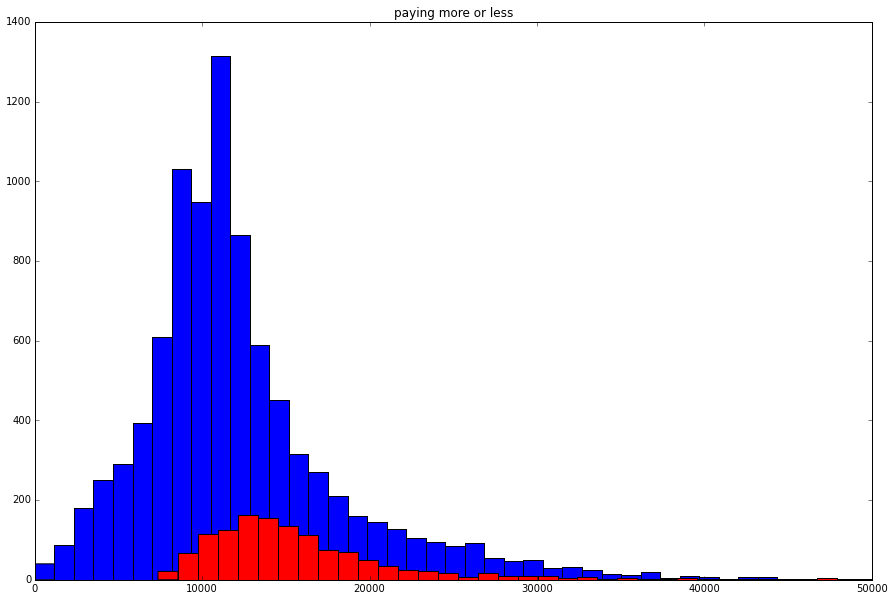

In [194]:
plt.figure(figsize=(15,10))
plt.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1], bins = 200, label = "Paying less on monthly basis")
plt.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1], bins = 65, color= 'r', label = "Paying more on monthly basis")
plt.xlim(0,50000)
plt.title("paying more or less")

###### Weighted

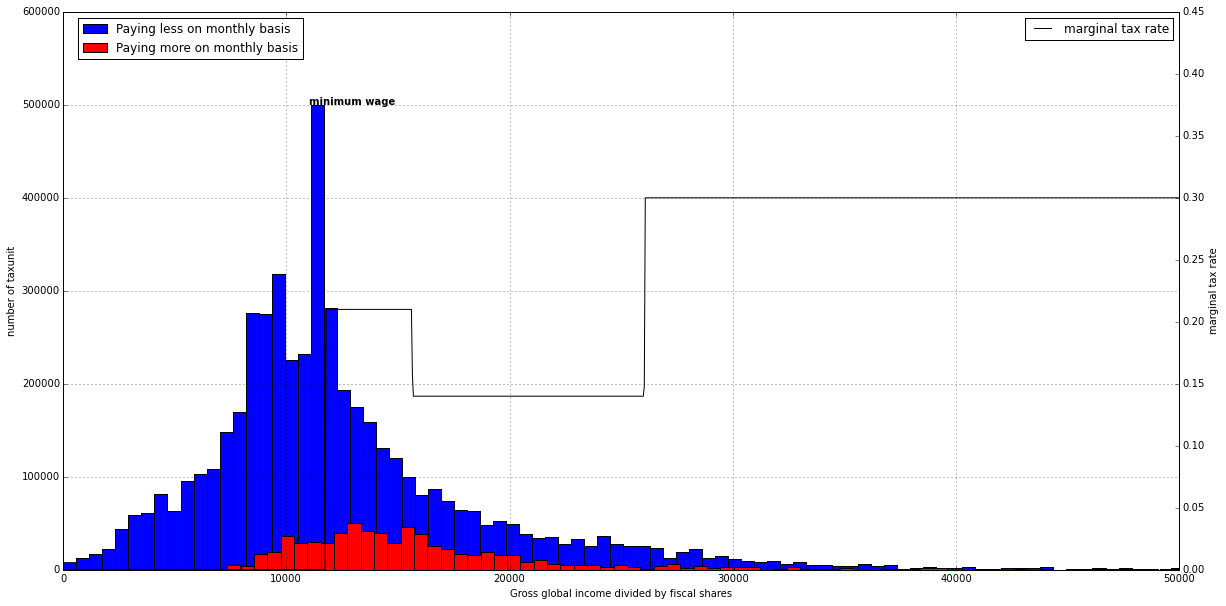

In [294]:


weights1 = weight_foyers[survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1]
weights2 = weight_foyers[survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1]

fig, ax1 = plt.subplots(figsize=(20, 10))


ax1.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1], bins = 400, label = "Paying less on monthly basis", weights= weights1)
ax1.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1], bins = 130, color= 'r', label = "Paying more on monthly basis",weights= weights2)


ax1.set_xlim(0,50000)
ax2 = plt.twinx()
ax2.plot(rbg_test_case[1:],marginal_rate, 'k', label = "marginal tax rate")
ax2.set_xlim(0,50000)
ax2.legend()
ax1.legend(bbox_to_anchor=(0.22, 1))
ax1.grid(which = 'both')
ax1.text(11000,500000, u"minimum wage", weight = 'bold',)
ax2.set_ylabel("marginal tax rate")
ax1.set_xlabel("Gross global income divided by fiscal shares")
ax1.set_ylabel("number of taxunit")
#plt.title("")


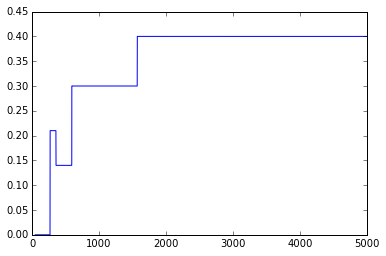

In [258]:
from openfisca_utils import make_ready_to_use_simulation
from openfisca_core import rates
simulation = make_ready_to_use_simulation.make_ready_to_use_simulation(2009,False)
rbg_test_case = simulation.calculate('rbg')
irpp_test_case = simulation.calculate('irpp')
marginal_rate = rates.marginal_rate(irpp_test_case, rbg_test_case)-1
to_change = pd.Series(marginal_rate)[marginal_rate>1].index
#to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index
marginal_rate[to_change] = marginal_rate[to_change+1]
plt.plot(marginal_rate)

In [247]:
to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index


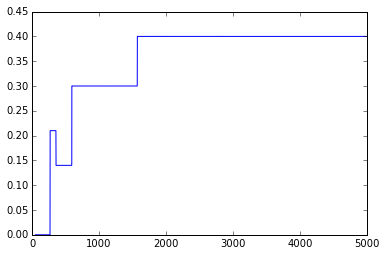

In [254]:
pd.Series(marginal_rate)[marginal_rate>1]

In [174]:
np.mean(survey_scenario.simulation.calculate("rbg"))

23384.496

array([ 2.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32)

In [161]:
np.array([True,True,False]) *np.array([2,3,4])

array([2, 3, 0])

In [145]:
pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel") - survey_scenario.simulation.calculate_add("revdisp_mensuel_compensated_ir_mensuel")>1)

False    48252
True       764
dtype: int64

#### Same annalysis with benefits

In [ ]:
survey_scenario.compute_aggregate("rsa_socle_majore_mensualise")

In [ ]:
survey_scenario.compute_aggregate("rsa_non_majore")

In [ ]:
pd.Series(survey_scenario.simulation.calculate("rsa_eligibilite_tns", "2009-01")).value_counts()

# END

### Utility :

In [ ]:
def utility(array = None, hp_young_coef = 0.89):
    reference = mesures.revdisp
    label = u"Revenu disponible du ménage"
    def function(self, simulation, period):
        '''
        Revenu disponible - ménage
        'men'
        '''
        utility = -(array + 5000) **-hp_young_coef #on ajoute 5000 pour pas avoir les familles à 0 de revdisp qui font - inf

        return utility

### Taux d'intérêt

In [ ]:
def revdisp_tx(var = None, taux = None):
    revdisp_i = 0
    for month in range(0,12):
        monthly_taux = ((1+taux)**(1/12)) 
        revdisp_i += (
            survey_scenario.simulation.calculate(var, survey_scenario.simulation.period.offset(month, 'month').this_month) 
            / (monthly_taux)**month 
                      )
    return revdisp_i


In [ ]:
revdisp_tx('revdisp_mensuel_ir_mensuel', 1.6)

In [ ]:
survey_scenario.simulation.period.offset(2, 'month').this_month

In [ ]:
variable = 'rsa'
monthly_df = pd.DataFrame(
                dict((column_name+"_"+period, survey_scenario.simulation.calculate_add(column_name, period)) 
                for period in ['{}-{}'.format( 2009, str(month).zfill(2)) for month in range(1, 13)] for column_name in [variable]) #TODO mensualize : allow for periods
                )
monthly_df.T

In [ ]:
ir_comp_df = pd.DataFrame({'diference':(survey_scenario.simulation.calculate("irpp") - (survey_scenario.simulation.calculate_add("irpp_mensuel")/(lambda_compensation+12))*12),
                           'ir_annuel' : survey_scenario.simulation.calculate("irpp"),
                           'ir_mensuel' :  survey_scenario.simulation.calculate("irpp_mensuel"),
                           'ir_mensuel_compensated' :  (survey_scenario.simulation.calculate_add("irpp_mensuel")/(lambda_compensation+12))*12,
                           'lambda_c' : survey_scenario.simulation.calculate("lambda_compensation"),
                           })
ir_comp_df[ir_comp_df.diference > 10]
#ir_comp_df[ir_comp_df.lambda_c > 1]

In [ ]:
print (ir_comp_df[np.abs(ir_comp_df.difence )>10].ir_annuel == 0).value_counts()
ir_comp_df[np.abs(ir_comp_df.difence )>10] # Tout les Ir_mensuel dif

## Tests of conformity

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rev_sal'),survey_scenario.simulation.calculate_add("rev_sal_mensuel_times_12")/12, decimal = 1,
                                    ) #Good


In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('salcho_imp'),survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12, decimal = 0,
                                    )  #Semble normal, ce sont les 4% qui touchent les plafonds tspr.abat_pro min et max TODO: à vérifier que c'est bien celà, voir tout en bas.


In [ ]:
print survey_scenario.compute_aggregate('salcho_imp')/10**9
print survey_scenario.compute_aggregate('salcho_imp_mensuel_times_12')/12/10**9

In [ ]:
filter_salcho_imp = ~(np.abs(survey_scenario.simulation.calculate('salcho_imp')- survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12)>2)

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),
                                     survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -1,
                                    )

In [ ]:
print survey_scenario.compute_aggregate('sal_pen_net')/10**9
print survey_scenario.compute_aggregate('sal_pen_net_mensuel_times_12')/12/10**9

In [ ]:
print survey_scenario.compute_aggregate('retraite_imposable')/10**9 +  survey_scenario.compute_aggregate('pen_net')/10**9


In [ ]:
np.testing.assert_array_almost_equal(pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net'))[filter_salcho_imp],
                                     pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12)[filter_salcho_imp], decimal = -1,
                                    )

In [ ]:
print survey_scenario.compute_aggregate('sal_pen_net')/10**9
print survey_scenario.compute_aggregate('sal_pen_net_mensuel_times_12')/12/10**9

In [ ]:
print survey_scenario.simulation.calculate_add("sal_pen_net_mensuel_times_12").sum()/12
print ((survey_scenario.simulation.calculate("sal_pen_net").sum()/1)*survey_scenario.simulation.calculate("wprm").sum())
print (survey_scenario.simulation.calculate("sal_pen_net").sum()/1 - survey_scenario.simulation.calculate_add("sal_pen_net_mensuel_times_12").sum()/12)

In [ ]:
survey_scenario.compute_aggregate('sal_pen_net')/10**9

In [ ]:
np.testing.assert_array_almost_equal(pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net'))[filter_salcho_imp],
                                     pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12)[filter_salcho_imp], decimal = -1,
                                    )

In [ ]:
df = pd.DataFrame({'annuel':survey_scenario.simulation.calculate('salcho_imp'),'mensuel':survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12,
                  'frais_reels': survey_scenario.simulation.calculate('frais_reels', "2009"),
                  
                  })
df = df[np.abs(df.annuel - df.mensuel)>1]
print df.shape
df

In [ ]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')/10**9

In [ ]:
lambdac = survey_scenario.simulation.calculate('lambda_compensation')

In [ ]:
survey_scenario.simulation.calculate('irpp_mensuel','2009-01')

In [ ]:
print survey_scenario.simulation.period

In [ ]:
variable ='salaire_imposable'
pd.DataFrame({'tspr':survey_scenario.simulation.calculate(variable,'2009'), variable: survey_scenario.simulation.calculate_add(variable)})

In [ ]:

#survey_scenario = create_survey_scenario(2009)
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['irpp','irpp_mensuel','rng','rng_mensuel_times_12'], ['irpp_mensuel'])['foyers_fiscaux']; df1

In [ ]:
df1[df1.irpp == df1.irpp_mensuel].shape

In [ ]:
df1[df1.irpp != df1.irpp_mensuel]

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('salcho_imp'),survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12, decimal = -2,
                                    )


In [ ]:
variable = 'frais_reels'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}'.format(variable)])['individus']; 
df1['{}'.format(variable)] = df1['{}'.format(variable)]/12
df1.T

In [ ]:
survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rng'),survey_scenario.simulation.calculate_add('rng_mensuel_times_12')/12, decimal = -2,
                                    )


In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rbg'),survey_scenario.simulation.calculate_add('rbg_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rev_cat_tspr'),survey_scenario.simulation.calculate_add('rev_cat_tspr_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:
pd.Series(survey_scenario.simulation.calculate('chomage_imposable','2009-02')).value_counts()

In [ ]:
pd.Series(survey_scenario.simulation.calculate('chomage_imposable')==0).value_counts()

In [ ]:
sal_pen_df = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['sal_pen_net','sal_pen_net_mensuel_times_12'], ['sal_pen_net_mensuel_times_12'])['individus']
sal_pen_df[sal_pen_df.sal_pen_net != sal_pen_df.sal_pen_net_mensuel_times_12/12].T

In [ ]:
variable = 'salaire_imposable'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}'.format(variable)])['individus']; 
df1['{}'.format(variable)] = df1['{}'.format(variable)]/12
df1.T

In [ ]:
#RTO déclarant 1 tous nul
pd.Series(survey_scenario.simulation.calculate('rto_net_declarant1') == 0).value_counts()

In [ ]:
variable = 'salcho_imp'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['individus']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
pd.DataFrame({'1absolute':survey_scenario.simulation.calculate('rev_cat_tspr')- survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12,
              '2relatif': (survey_scenario.simulation.calculate('rev_cat_tspr') - survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12) /survey_scenario.simulation.calculate('rev_cat_tspr'),
              '3annuel': survey_scenario.simulation.calculate('rev_cat_tspr'),
              '4mensuel': survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12,
             
             
             })

In [ ]:
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['rng'], ['rng_mensuel_times_12'])['foyers_fiscaux']; df1.T

In [ ]:
variable = 'rbg'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['foyers_fiscaux']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
variable = 'rev_cat_tspr'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['foyers_fiscaux']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
pd.DataFrame({'tspr':survey_scenario.simulation.calculate("tspr"), 'tspr_mensuel_times12': survey_scenario.simulation.calculate_add('tspr_mensuel_times_12')/12})

In [ ]:
variable ='salaire_imposable'
pd.DataFrame({'tspr':survey_scenario.simulation.calculate(variable,'2009'), variable: survey_scenario.simulation.calculate_add(variable)})

In [ ]:
survey_scenario.simulation.calculate("tspr_mensuel_times_12", '2009-01')

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural_by_period(['irpp_mensuel'], periods_list = ['2009-01','2009-02','2009-03'])['foyers_fiscaux'];df.concat(df1)

In [ ]:
trash_2 = survey_scenario.create_data_frame_by_entity_key_plural_by_period(['salaire_net'], periods_list = ['a','2013'])

In [ ]:
trash['foyers_fiscaux']

In [ ]:
import logging

log = logging.getLogger(__name__)

In [ ]:
log.error('boum')

In [ ]:
periods_list = ["20126"]
for period in periods_list:
            try:
                periods.period(period)
                print 'good'
            except ValueError:
                #log.info("{} in your periods dict is not an OpenFisca period".format(period))
                raise
                print'bad'
                pass

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(variables = ['irpp','irpp_mensuel','rng', 'blob'])['foyers_fiscaux'];df

In [ ]:
survey_scenario.tax_benefit_system.

In [ ]:
survey_scenario.create_data_frame_by_entity_key_plural(variables = ['irpp','irpp_mensuel', 'sali'])

In [ ]:
df[df.irpp +0.05 > df.irpp_mensuel]

In [ ]:
pd.Series((survey_scenario.simulation.calculate('salaire_imposable')>0)).value_counts()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
lambdac = pd.Series(lambdac)

In [ ]:
lambdac.loc[(lambdac == -np.inf)|lambdac.isnull()]=0

In [ ]:
#lambdac.drop(lambdac.loc[((lambdac<0.1) & (lambdac>-0.1))].index, inplace = True)

In [ ]:
lambdac.drop(lambdac.loc[((lambdac>200) | (lambdac<-200))].index, inplace = True)

In [ ]:
lambdac.min()

In [ ]:
lambdac.hist(bins=100)
plt.xlim(-50,150)
plt.ylim(0,2700)

In [ ]:
lambdac[((lambdac>40) & (lambdac<55))].hist(bins = 100)

In [ ]:
pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel')-survey_scenario.simulation.calculate_add('irpp')).hist(bins = 10**4)
#plt.ylim(0,100)
plt.xlim(0,100)

In [ ]:
print survey_scenario.weight_column_name_by_entity_key_plural
survey_scenario.simulation.calculate_add(survey_scenario.weight_column_name_by_entity_key_plural['foyers_fiscaux'], period = period).astype(float)

In [ ]:
weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)

### Stat de Base sur la différence

In [ ]:
# We put positive value for income tax (negative in openfisca output)
impot_annuel =  -survey_scenario.simulation.calculate('irpp')
impot_mensuel =  -survey_scenario.simulation.calculate_add('irpp_mensuel')

In [ ]:
print "il y a {}/{} cas ou l'impot annuel est null soit {}%".format((impot_annuel == 0).sum(),impot_mensuel.shape[0],(impot_annuel == 0).sum()/impot_mensuel.shape[0] )

In [ ]:
impot_annuel = survey_scenario.simulation.calculate('irpp')
impot_mensuel = survey_scenario.simulation.calculate_add('irpp_mensuel')
print "il y a {}/{} cas ou l'impot annuel et mensuel est null soit {}%".format(((impot_annuel == 0) & (impot_mensuel == 0)).sum(),impot_mensuel.shape[0],((impot_annuel == 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0] )
print "il y a {}/{} cas ou l'impot mensuel est null, mais pas l'annuel soit {}% (pas possible ?)".format(((impot_annuel != 0) & (impot_mensuel == 0)).sum(), impot_mensuel.shape[0],((impot_annuel != 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])


#### Annuel == mensuel 

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel soit {}% ".format((np.abs(impot_annuel - impot_mensuel)==0).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)==0).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 1 cents près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<0.01).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<0.01).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 1 euros près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<1).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<1).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 10 euros près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<10).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<10).sum()/ impot_mensuel.shape[0])

####  mensuel < annuel (supposé être l'exception)

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_annuel-impot_mensuel >10 ).sum(), impot_mensuel.shape[0], ((impot_annuel-impot_mensuel >10)).sum()/ impot_mensuel.shape[0])

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_annuel-impot_mensuel >10 ).sum(), impot_mensuel.shape[0], ((impot_annuel-impot_mensuel >10)).sum()/ impot_mensuel.shape[0])

####  mensuel < annuel (supposé être la norme)

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est supérieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel < impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel < impot_mensuel).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est supérieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_mensuel-impot_annuel >10 ).sum(), impot_mensuel.shape[0], ((impot_mensuel-impot_annuel >10)).sum()/ impot_mensuel.shape[0])

In [ ]:
irpp_mois_list = 'ir'

## Différence annuel vs. mensuel

### Perdants

In [ ]:
simulation.calculate

####  mensuel < annuel

In [ ]:
survey_scenario.weight_column_name_by_entity_key_plural

### Nul du à la décote

In [ ]:
decote = survey_scenario.simulation.calculate_add('decote')
ir_plaf_qf = survey_scenario.simulation.calculate_add('ir_plaf_qf')

decote_m = survey_scenario.simulation.calculate_add('decote_mensuel_times_12')
ir_plaf_qf_m = survey_scenario.simulation.calculate_add('ir_plaf_qf_mensuel_times_12')

decote = min_(decote, ir_plaf_qf)
decote_m = min_(decote_m, ir_plaf_qf)

In [ ]:
irpp_mois_list = ['irpp_mois{}'.format(month) for month in range(1,13)]

### DIfférence de décote

In [ ]:
(survey_scenario.compute_aggregate('decote_mensuel_times_12')/12) - (survey_scenario.compute_aggregate('decote'))

## ANnalyse

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel'])['foyers_fiscaux']

In [ ]:
irpp_month = survey_scenario.simulation.calculate('irpp_mensuel', '2009-{}'.format(month))

for month in range(1,13):
    irpp_month = survey_scenario.simulation.calculate('irpp_mensuel', '2009-{}'.format(month))
    irpp_serie = pd.Series(irpp_month, name = 'irpp_{}'.format(month))
    df = df.T.append(irpp_serie).T

In [ ]:
df.T

### Droppe les cas où la différence d'impôt est inférieure à 10 euros

In [ ]:
import numpy as np

In [ ]:
df_ir_1 = df[(np.abs(df.irpp - df.irpp_mensuel) - 5)> 0 ]

In [ ]:
df_ir_1.shape

In [ ]:
(df.decote_gain_fiscal> df.decote_gain_fiscal_mensuel_times_12/12).shape

### Droppe les cas où l'impôt mensuel est supérieur à l'annuel

In [ ]:
df_ir_sup_ir_m = df_ir_1[df_ir_1.irpp < df_ir_1.irpp_mensuel ]

In [ ]:
df_ir_sup_ir_m.T

In [ ]:
print "il y a {} cas ou l'impôt annuel est supérieur au mensuel".format(df_ir_sup_ir_m.shape[0])

#### Différence due à la décote

In [ ]:
df_ir_sup_ir_m.irpp + df_

In [ ]:
df_ir_sup_ir_m.T

In [ ]:
df.irpp

In [ ]:
survey_scenario.create_data_frame_by_entity_key_plural(['irpp','ip_net', ])['foyers_fiscaux']

In [ ]:
survey_scenario.compute_aggregate('irpp')/10**9

In [ ]:
survey_scenario.compute_aggregate('irpp')/10**9

In [ ]:
survey_scenario.compute_aggregate('irpp_mensuel')/10**9

In [ ]:
((impot_annuel == 0) & (impot_mensuel == 0)).sum()

In [ ]:
survey_scenario.compute_pivot_table(columns = ['nbF'], values = ["irpp"])

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['irpp','ip_net', ])['foyers_fiscaux']

In [ ]:
#### Modified Adrien


from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


lambda_compensation = simulation.calculate_add("lambda_compensation")
import pandas as pd
lambda_compensation = pd.Series(lambda_compensation)
print lambda_compensation.isnull().value_counts() #on devrait avoir autant de lambda compensation null que d'IR

higher_mensual = pd.Series((simulation.calculate_add("irpp_mensuel")> simulation.calculate_add('irpp'))).value_counts(dropna = False)
print "There is {} higher mensual then annual IR (not supposed to happened)".format(higher_mensual)

impot_annuel = simulation.calculate("irpp")
impot_mensuel = simulation.calculate_add("irpp_mensuel")
print "il y a {}/{} cas ou l'impot annuel et mensuel est null soit {}%".format(((impot_annuel == 0) & (impot_mensuel == 0)).sum(),impot_mensuel.shape[0],((impot_annuel == 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0] )
print "il y a {}/{} cas ou l'impot mensuel est null, mais pas l'annuel soit {}% (pas possible ?)".format(((impot_annuel != 0) & (impot_mensuel == 0)).sum(), impot_mensuel.shape[0],((impot_annuel != 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])


irpp = pd.Series(simulation.calculate("irpp"), name = "irpp")
irpp_mensuel = pd.Series(simulation.calculate("irpp_mensuel"),name = 'irpp_mensuel')
decote = pd.Series(simulation.calculate("decote"), name = "decote")
ir_plaf_qf = pd.Series(simulation.calculate("ir_plaf_qf"))
decote = min_(decote, ir_plaf_qf)


ir_plaf_qf_m = pd.Series(simulation.calculate_add("ir_plaf_qf_mensuel_times_12"))
decote_m = pd.Series(simulation.calculate_add("decote_mensuel_times_12"))
decote_m = min_(decote_m, ir_plaf_qf_m)/12

print u"le gain fiscal de la décote est {}% plus élevé en mensuel".format(((decote_m.sum()/decote.sum()-1))*100)




ppe = pd.Series(simulation.calculate("ppe"), name="ppe")

#Qui sont ceux qui payent de l'impôt en trop en mensuel ?


#7657 ;
annomalie = (impot_mensuel<impot_annuel +1) | (impot_mensuel<impot_annuel - 1) #gérer les tout petits problèmes d'arrondis

print u"{}% payent plus en annuel à cause de la décote (ou tout du moins en partie)".format((decote_m[annomalie]==0).value_counts(normalize = True)[0])
print (decote_m[annomalie]==0).value_counts(normalize = True)
#D'ou viennent les autres annomalies, pourquoi plus d'ir en annuel



df_ir_mois = pd.DataFrame()
for mois in range(1,13):
    tempo = pd.Series(simulation.calculate('irpp_mensuel', '2009-{}'.format(mois)))
    tempo.name = 'irpp_mois_{}'.format(mois)
    df_ir_mois = df_ir_mois.append(tempo)

df_ir_mois = df_ir_mois.append(irpp)
df_ir_mois = df_ir_mois.append(irpp_mensuel)

decote.name = "decote"
df_ir_mois = df_ir_mois.append(decote)

decote_m.name = "decote_m"
df_ir_mois = df_ir_mois.append(decote_m)


df_ir_mois.to_hdf('/Users/adrienpacifico/Desktop/to_trash.h5', 'df_ir_mois')


mr = 17352


# Controle

In [ ]:
variable = 'salcho_imp'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['individus']; 
#df1 = df1[df1['{}'.format(variable)] != df1['{}'.format(variable)]]
df1["somme_annuelle"] = (df1.sum(axis = 1) - df1.salcho_imp)/12
df1 = df1[ np.abs(df1['{}'.format("somme_annuelle")] - df1['{}'.format(variable)] >2)]
df1.T

In [ ]:
df = pd.DataFrame({'annuel':survey_scenario.simulation.calculate('salcho_imp'),'mensuel':survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12,
                  'frais_reels': survey_scenario.simulation.calculate('frais_reels', "2009"),
                  
                  })
df = df[np.abs(df.annuel - df.mensuel)>1]
print df.shape
df